Unfortunately Github doesn't render ipywidgets, which allow us to interactively alter the parameters of the model. If you want to mess with the parameters yourself then download this file, and also install and activate ipywidgets, which you can do in the command line interface with the following commands:
```
pip install ipywidgets
jupyter nbextension enable --py widgetsnbextension
jupyter labextension install @jupyter-widgets/jupyterlab-manager
```

<img src="SUschema.png">
Fig 1: Schematic to represent the various reactions of photosynthesis through synthesising units. Each synthesizing unit has incoming and outgoing fluxes. 

<img src = "carbo_oxo.png">
Fig 2: Schematic for simultaneous oxygenation and carboxylation of RuBP according to SU kinetics, whereby forward reactions are much stronger than reverse reactions. 

<h2>Current Model and Next Steps</h2>
The schematic in figure 1 depicts different fluxes for ATP and NADPH. This will likely be neccessary to account for balancing of the ATP:NADPH ratio through Cyclic Electron Transport, export of NADPH, or some other method. Currently, however, we set $j_{ATP} = j_{NADPH} = j_{PQ}$, the rate of photochemcial quenching.

<h3>PGA reduction and Calvin Cycle</h3>
Based on the schematic in figure 1, the net rate of photosynthesis, $j_{prod}$ incorporates the electron transport flux $j_{PQ}$ and the PGA synthesis flux $j_{pga,net}$ in parallel. Formulated according to Kooijman 1998's Synthesizing Unit kinetics:
\begin{equation}
    j_{prod} = (\frac{1}{k_{E_C}} + \frac{1}{\kappa_C j_{PQ}} + \frac{1}{j_{pga,net}} - \frac{1}{\kappa_C j_{PQ} + j_{pga,net}})^{-1}
\end{equation}
where $k_{E_R}$ represents the maximum velocity of enzymes in the reduction of PGA, and $\kappa_C$ represents the number of PGA produced per product of electron transport.
$j_{pga,net} = 2j_{cA} + \frac{3}{2}j_{oA}$ as for every Carbon consumed, 2 PGA are produced, and for every 2 Oxygen consumed, 3 PGA are produced.

We can derive $j_{cA}$ as $-d[C]_T/dt$ based on figure 2, which yields 
$$j_{cA} = -k^+_c[C][E]_T(1 + \frac{k^+_R[R]}{k^+_o[O] + k^+_c[C]})f_E $$
where 
$$ f_E = \frac{[E]}{[E]_T} = (1 + (\frac{1}{k^+_R[R]} + 1)(\tilde{k^+_o}[O] +  \tilde{k^+_c}[C]) + k^+_R[R]\frac{1 + \tilde{k^+_o}[O] +  \tilde{k^+_c}[C]}{k^+_o[O] +  k^+_c[C]})^{-1} $$
where $\tilde{k^+_o} = k^+_o/\tilde{k_{ERO}}$ and $\tilde{k^+_c} = k^+_c/\tilde{k_{ERC}}$, whereby $\tilde{k_{ERC}} = k_{ERC}+k^-_c+k^-_R$ and $\tilde{k_{ERO}} = k_{ERO}+k^-_o+k^-_R$
<br>
By symmetry,
$$j_{oA} = -k^+_o[O][E]_T(1 + \frac{k^+_R[R]}{k^+_c[C] + k^+_o[O]})f_E $$

<h4>Additional factors to consider for Calvin Cycle/PGA reduction.</h4>
PGA and Ribulose-5-Phosphate compete for ATP, whereas in this model the rate of ATP delivered to both reactions (see RuBP regeneration) is equal to the overall rate of electron transport.

<h4>Incorporating RuBP regeneration</h4>
Based on figures 1 and 2, we can derive a dynamical system for the consumption and regeneration of $R$:
$$
\frac{dR}{dt} = -[E]_Tf_E(k^+_R[R] + k^+_c[C] + k^+_o[O]) + (\frac{1}{k_{E_R}} +\frac{1}{\kappa_R j_{PQ}} + \frac{1}{j_{prod}} - \frac{1}{(\kappa_R j_{PQ} + j_{prod}})^{-1}
$$
where $\kappa_R$ represents the number of RuBP generated per product of electron transport, and $k_{E_R} represents the velocities of enzymes involved in RuBP regeneration, such as Ribulose-5-phosphate kinase.  


<h3>Light reactions and electron transport</h3>

<h4>Ye model</h4>
We started by using the electron transport rate derived by Ye et al (Ye 2013):
$$ j_{ph} = \alpha_e \frac{1-\beta_eI}{1+\gamma_eI}I
$$
where $\alpha_e$ is the initial slope of the $j_{ph}$-$I$ curve, and $\beta_e$ and $\gamma_e$ are the coefficiencts for photoinhibition and light saturation, respectively. $I$ is irradiance. This model runs into a couple issues, one being that $j_{ph}$ can become negative, and the other that the probabilities of NPQ and flourescence are independant of light.

<h4> Alternatives to Ye model </h4>

<h4>Model A: Incorporating light dependant flourescence</h4>
We can potentially correct the Ye model by revising the original derivation and multiplying $\xi_3R_{ki}$ by $I$, leading to:
$$
j_{ph} = \alpha_e \frac{1-\frac{\beta_eI}{z_1I+z_2}}{1+\gamma_eI}I
$$


<h4>Model B: Circuit formulation</h4>
We can treat both light dependant ($R_I$) and light independant ($R_C$) photoinhibitory mechanisms as resistances to photochemistry, where $R_I = R_{I0}I$. $I$ is analogous to voltage. 
<img src = "circuit.png">
Thus, using Ohm's law, ${j_ph} = \frac{I}{R_{I0}I+R_C}$. At high light intensities, $j_{ph}$ saturates to $\frac{1}{R_{I0}}$ so we can say $R_{I0} = 1/j_{max}$

<h3> Model C: Balancing fluxes with a dynamical system </h3>
<img src = "lightreaction.png">
We seek to mechanistically model the light reactions by balancing incoming and outgoing fluxes. Light ($j_I$) is intercepted by flourescence ($j_F$) and thermal dissipation ($j_{NPQ}$), the latter of which is controlled by the pH gradient, which is determined by the difference between the incoming flux from photochemical quenching, $j_{PQ}(t-1)$, and outgoing ATP flux, $j_{ATP}(t-1)$. $j_{ATP}$ depends on the rate of the Calvin Cycle, which in turn depends on $j_{PQ}$. Thus, we can formulate $j_{PQ}$ as a discrete dynamical system, where $j_{PQ}(t) = f(j_{PQ}(t-1))$.
Ultimately, it would be interesting if the system is able to imitate the following experimental results:
<img src="darkacc.png">

As we can see in the schematic, $J_{PQ}$ is the portion of irradiance not used for flourescence and thermal dissipation.
$$
j_{PQ}(t) = j_I - j_F - j_{NPQ}(t)
$$
Where we can think of $j_{NPQ}$ as consuming a fraction $f_{NPQ}$ of $j_H$, which represents the build up of protons due to the difference between the incoming $j_{PQ}(t-1)$ and outgoing $j_{ATP}(t-1)$.
$$
j_{NPQ} = f_{NPQ}(j_{PQ}(t-1) - j_{ATP}(t-1))
$$
We treat ATP synthase as a synthesizing unit, where light and ADP from the Calvin cycle are consumed to form ATP:
$$
j_{ATP}(t-1) = (\frac{1}{j_{syn}} + \frac{1}{j_{PQ}(t-1)} + \frac{1}{j_{ADP}(t-1)} - \frac{1}{j_{PQ}(t-1) + j_{ADP}(t-1)})^{-1}
$$
Where 
$$
j_{ADP}(t-1) = \frac{2}{3}j_{prod}(t-1) + \frac{1}{3}j_{RuBP}(t-1)
$$
In $j_{prod}$ and $j_{RuBP}$, $j_{ph}$ would be replaced with $j_{PQ}(t-1)$

In [ ]:
zun = .21
zdo = .33

In [26]:
def jpha(I, zun = zun, zdo = zdo):
    frac = beta*I/(zun*I+zdo)
    jph = I*alpha*(1-frac)/(1+gamma*I)
    return jph

In [27]:
#model Aa: multiplying I by both parameters
def jphaa(I, zun=zun, zdo=zdo):
    frac = beta*I/(zun*I+zdo*I)
    jph = I*alpha*(1-frac)/(1+gamma*I)
    return jph

<h4>Circuit formulation</h4>
We can treat both light dependant ($R_I$) and light independant ($R_C$) photoinhibitory mechanisms as resistances to photochemistry, where $R_I = R_{I0}I$. $I$ is analogous to voltage. 
<img src = "circuit.png">
Thus, using Ohm's law, ${j_ph} = \frac{I}{R_{I0}I+R_C}$. At high light intensities, $j_{ph}$ saturates to $\frac{1}{R_{I0}}$ so we can say $R_{I0} = 1/j_{max}$

In [31]:
def dRdt(R, C = 230, O =210, kc = kc, ko = ko, I = I, Et = Et, alpha = alpha, beta = beta, gamma = gamma, kr = kr, kE = kE, kERO=kERO, kERC = kERC):
    jph = I*alpha*(1-beta*I)/(1+gamma*I)
    ksum = ko*O/kERO + kc*C/kERC
    fE = (1 + ((1/(kr*R))+1)*ksum + kr*R*(1+ksum)/(ko*O + kc*C))**(-1)
    jcA = kc*C*Et*(1+(kr*R/ksum))*fE
    joA = ko*O*Et*(1+(kr*R/ksum))*fE
    jpga = (2*jcA+1.5*joA)
    jprod = ((1/kE)+(1/jph)+(1/jpga)-(1/(jpga+jph)))**(-1)
    dRdt = -1*Et*fE*(kr*R+kc*C+ko*O) + (5/6)*jprod
    return dRdt

In [1]:
@interact(alpha=(0.01,10,.1), dt = (0,.01, .001), tsteps=(0,100000, 10), kE=(0, 100000000,1))
def simulateR(dt = .001, tsteps = 1000, Ro = 1, C = 230, O =210, kc = kc, ko = ko, I = I, Et = Et, alpha = alpha, beta = beta, gamma = gamma, kr = kr, kE = 1000, kERO=kERO, kERC = kERC):
    Rlist = np.zeros(tsteps)
    Rlist[0] = Ro
    jprodlist = np.zeros(tsteps)
    jprodlist[0] = jprod(Ro)
    for t in range(tsteps-1):
        jprodlist[t+1] = jprod(Rlist[t])
        Rlist[t+1] = Rlist[t] + dRdt(Rlist[t], alpha = alpha, kE = kE, C = C)*dt
    print(Rlist[tsteps-2], jprodlist[tsteps-2])
    plt.plot(range(tsteps), Rlist, label='RuBp')
    #plt.plot(range(tsteps), jprodlist, label = 'jprod')
    plt.legend()
    plt.xlabel('time')
    plt.show()
    #print(Rlist)

NameError: name 'interact' is not defined

*Notes 2/12: I've realized that this model will inevitably cause RuBP to decrease to zero. If, at every time step, $R$ is decreasing by close to $j_{prod}$, and only increasing by $5/6*j_{prod}$, then it will eventually just be used up. I noticed that if $j_{prod}$ is multiplied by a scaling factor of about 55 or greater, then $R$ will increase rather than decrease. If $j_{prod}$ is multiplied by 53, it will decrease, but to around 70 rather than to zero. We may get around this issue by considering that only 2/3 of the ATP generated by light is used for $j_{prod}$, while the rest is used directly for RuBP production.*

*Notes 2/15: It actually turns out that R does not go to zero but to a value close to zero. However, increasing alpha can increase this value significantly.*

<h4>Revised dR/dt model</h4>
We now incorporate the partitioning of ATP between TPU production and RuBP regeneration into our model:
$$
\frac{dR}{dt} = -[E]_Tf_E(k^+_R[R] + k^+_c[C] + k^+_o[O]) + (\frac{1}{k_{E_2}} +\frac{3}{j_{ph}} + \frac{6}{5 j_{prod}} - \frac{1}{(1/3) j_{ph} + (5/6) j_{prod}})^{-1}
$$
where we slightly modify $j_{prod}$
$$
j_{prod} = (\frac{1}{k_{E_1}} + \frac{3}{2 j_{ph}} + \frac{1}{j_{pga,net}} - \frac{1}{j_{pga,net} + (2/3) j_{ph}})^{-1}
$$
where $k_{E_1}$ and $k_{E_2}$ represent the velocities of enzymes in the production of G3P (phosphoglycerate kinase and NADP:G3P dehydrogenase) and RuBP regeneration (Ribulose-5-phosphate kinase, etc.) respectively.


*Notes 2/12: Since I don't know $k_{E_1}$ and $k_{E_2}$, I can formulate them as multiples of $k_c$, which is known from the Farquhar paper. So we set $k_{E_1} = \alpha_1 k_c$, $k_{E_2} = \alpha_2 k_c$.*

In [33]:
alphaa = 1
alphab = 1000

In [34]:
#Coding the revised model
def dRdtalt(R, C = 230, O =210, kc = kc, ko = ko, alphaa = alphaa, alphab=alphab, I = I, Et = Et, alpha = alpha, beta = beta, gamma = gamma, kr = kr, kE = kE, kERO=kERO, kERC = kERC):
    jph = I*alpha*(1-beta*I)/(1+gamma*I)
    ksum = ko*O/kERO + kc*C/kERC
    fE = (1 + ((1/(kr*R))+1)*ksum + kr*R*(1+ksum)/(ko*O + kc*C))**(-1)
    jcA = kc*C*Et*(1+(kr*R/ksum))*fE
    joA = ko*O*Et*(1+(kr*R/ksum))*fE
    jpga = (2*jcA+1.5*joA)
    kEa = alphaa*kc
    kEb = alphab*kc
    jpc = (2/3)*jph
    jpr = (1/3)*jph
    jprod = (5/6)*((1/kEa)+(1/jpc)+(1/jpga)-(1/(jpga+jpc)))**(-1)
    jrubp = (1/kEb + 1/jpr + 1/jprod - 1/(jpr+jprod))**(-1)
    dRdt = -1*Et*fE*(kr*R+kc*C+ko*O) + jrubp
    return dRdt

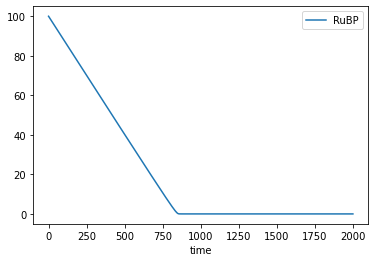

In [35]:
@interact(alphaa = (0.1, 1000, 10), alphab = (0, 1000, 10))
def simulatealtR(Ro = 100, tsteps = 2000, dt = .001, C = 230, O =210, kc = kc, ko = ko, alphaa = alphaa, alphab=alphab, I = I, Et = Et, alpha = alpha, beta = beta, gamma = gamma, kr = kr, kE = kE, kERO=kERO, kERC = kERC):
    R = np.zeros(tsteps)
    R[0] = Ro
    for t in range(tsteps-1):
        R[t+1] = R[t] + dRdtalt(R[t], alpha = alpha, alphaa = alphaa, alphab = alphab)*dt
    plt.plot(range(tsteps),R, label = 'RuBP')
    plt.legend()
    plt.xlabel('time')
    plt.show()

<h4>Analyzing dR/dt </h4>
One way that we can analyze dR/dt is by simultaneously analyzing the consumption of R and the production of R for fixed R.

In [36]:
def splitR(R, kE = 100):
    jph = I*alpha*(1-beta*I)/(1+gamma*I)
    ksum = ko*O/kERO + kc*C/kERC
    fE = (1 + ((1/(kr*R))+1)*ksum + kr*R*(1+ksum)/(ko*O + kc*C))**(-1)
    jcA = kc*C*Et*(1+(kr*R/ksum))*fE
    joA = ko*O*Et*(1+(kr*R/ksum))*fE
    jpga = (2*jcA+1.5*joA)
    jprod = ((1/kE)+(1/jph)+(1/jpga)-(1/(jpga+jph)))**(-1)
    cons = Et*fE*(kr*R+kc*C+ko*O)
    return cons, jprod

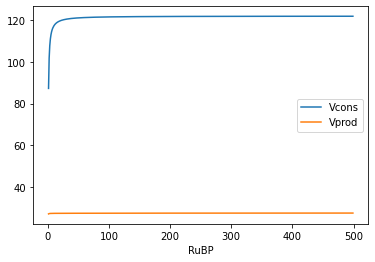

In [37]:
@interact()
def simulatesplitR(Rrange = 500, kE = 10000):
    consl = []
    jprodl = []
    Rl = range(1,Rrange)
    for r in Rl:
        cons, jprod = splitR(r, kE)
        consl.append(cons)
        jprodl.append(jprod)
    plt.plot(Rl, consl, label = 'Vcons')
    plt.plot(Rl, jprodl, label = 'Vprod')
    plt.legend()
    plt.xlabel('RuBP')
    plt.show()

<h3> Modelling light reactions by balancing fluxes </h3>
<img src = "lightreaction.png">
We seek to mechanistically model the light reactions by balancing incoming and outgoing fluxes. Light ($j_I$) is intercepted by flourescence ($j_F$) and thermal dissipation ($j_{NPQ}$), the latter of which is controlled by the pH gradient, which is determined by the difference between the incoming flux from photochemical quenching, $j_{PQ}(t-1)$, and outgoing ATP flux, $j_{ATP}(t-1)$. $j_{ATP}$ depends on the rate of the Calvin Cycle, which in turn depends on $j_{PQ}$. Thus, we can formulate $j_{PQ}$ as a discrete dynamical system, where $j_{PQ}(t) = f(j_{PQ}(t-1))$.
Ultimately, it would be interesting if the system is able to imitate the following experimental results:
<img src="darkacc.png">

As we can see in the schematic, $J_{PQ}$ is the portion of irradiance not used for flourescence and thermal dissipation.
$$
j_{PQ}(t) = j_I - j_F - j_{NPQ}(t)
$$
Where we can think of $j_{NPQ}$ as consuming a fraction $f_{NPQ}$ of $j_H$, which represents the build up of protons due to the difference between the incoming $j_{PQ}(t-1)$ and outgoing $j_{ATP}(t-1)$.
$$
j_{NPQ} = f_{NPQ}(j_{PQ}(t-1) - j_{ATP}(t-1))
$$
We treat ATP synthase as a synthesizing unit, where light and ADP from the Calvin cycle are consumed to form ATP:
$$
j_{ATP}(t-1) = (\frac{1}{j_{syn}} + \frac{1}{j_{PQ}(t-1)} + \frac{1}{j_{ADP}(t-1)} - \frac{1}{j_{PQ}(t-1) + j_{ADP}(t-1)})^{-1}
$$
Where 
$$
j_{ADP}(t-1) = \frac{2}{3}j_{prod}(t-1) + \frac{1}{3}j_{RuBP}(t-1)
$$
In $j_{prod}$ and $j_{RuBP}$, $j_{ph}$ would be replaced with $j_{PQ}(t-1)$

In [43]:
def jprodalt(pq, I, R):
    jph = pq
    ksum = ko*O/kERO + kc*C/kERC
    fE = (1 + ((1/(kr*R))+1)*ksum + kr*R*(1+ksum)/(ko*O + kc*C))**(-1)
    jcA = kc*C*Et*(1+(kr*R/ksum))*fE
    joA = ko*O*Et*(1+(kr*R/ksum))*fE
    jpga = (2*jcA+1.5*joA)
    jprod = ((1/kE)+(1/jph)+(1/jpga)-(1/(jpga+jph)))**(-1)
    dRdt = -1*Et*fE*(kr*R+kc*C+ko*O) + (5/6)*jprod
    return jprod, dRdt

In [44]:
def jpq(pq, I, R, jf=.1*I, fnpq=.2, jsyn=1.5):
    jp, jr = jprodalt(pq, I, R)
    jadp = 2*jp/3 + jr/3
    jatp = (1/jsyn + 1/pq + 1/jadp - 1/(pq + jadp))**(-1)
    jnpq = fnpq*(pq - jatp)
    jpq = I - jf - jnpq
    return jpq, jr, jnpq

In [45]:
def logistic(Io, Imax, x, kl):
    f = Imax/(1+np.exp(-kl*(x-Io)))
    return f

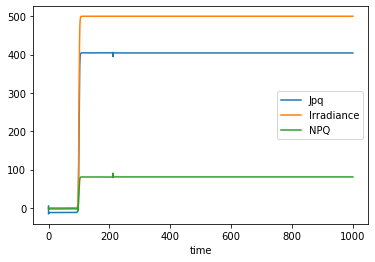

In [46]:
@interact(pqo = (0,10,.1), Ro=(0,500,10), time = (0,1000,1))
def integrated(pqo, Ro, Io=100, Imax=500, kl = 1, time=1000, dt = .001, C = 230, O =210, kc = kc, ko = ko, Et = Et, alpha = alpha, beta = beta, gamma = gamma, kr = kr, kE = kE, kERO=kERO, kERC = kERC):
    tsteps = np.linspace(0, time, time*10)
    jpqlist = np.zeros(len(tsteps))
    Rlist = np.zeros(len(tsteps))
    npqlist = np.zeros(len(tsteps))
    jpqlist[0] = pqo
    Rlist[0] = Ro
    ilist = [logistic(Io, Imax, t, kl) for t in tsteps]
    for t in range(len(tsteps)-1):
        jp, jr, npq = jpq(jpqlist[t], ilist[t], Rlist[t])
        Rlist[t+1] = Rlist[t] + jr*dt
        jpqlist[t+1] = jp
        npqlist[t] = npq
    plt.plot(tsteps, jpqlist, label='Jpq')
    #plt.plot(tsteps, Rlist, label = 'RuBP')
    plt.plot(tsteps, ilist, label='Irradiance')
    npqlist[-1] = npqlist[-2]
    plt.plot(tsteps, npqlist, label='NPQ')
    plt.legend()
    plt.xlabel('time')
    plt.show()
        